Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>
- Legend guide
    <https://matplotlib.org/users/legend_guide.html>
- Greenhouse gas
    <https://en.wikipedia.org/wiki/Greenhouse_gas>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
climate_1960_2018.shape

(20064, 63)

In [4]:
indicators = ['Population, total',
              'Population growth (annual %)']

population_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
population_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [5]:
population_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [6]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [7]:
pop_tot_1960_2018 = df_4each_indicator(population_1960_2018, 'Population, total')
pop_growthPct_1960_2018 = df_4each_indicator(population_1960_2018, 'Population growth (annual %)')

In [8]:
def billions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-9)

def billions_1dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.1f' % (x * 1e-9)

def billions_3dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.3f' % (x * 1e-9)

def millions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-6)

def millions_1dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.1f' % (x * 1e-6)

def milles_dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-3)

FORMATTER_BILLIONS_0DEC = FuncFormatter(billions_0dec)
FORMATTER_BILLIONS_1DEC = FuncFormatter(billions_1dec)
FORMATTER_BILLIONS_3DEC = FuncFormatter(billions_3dec)

FORMATTER_MILLIONS_0DEC = FuncFormatter(millions_0dec)
FORMATTER_MILLIONS_1DEC = FuncFormatter(millions_1dec)

FORMATTER_MILLES = FuncFormatter(milles_dec)

# YRS = mdates.YearLocator()
# YRFMT = mdates.DateFormatter('%Y')

## About population

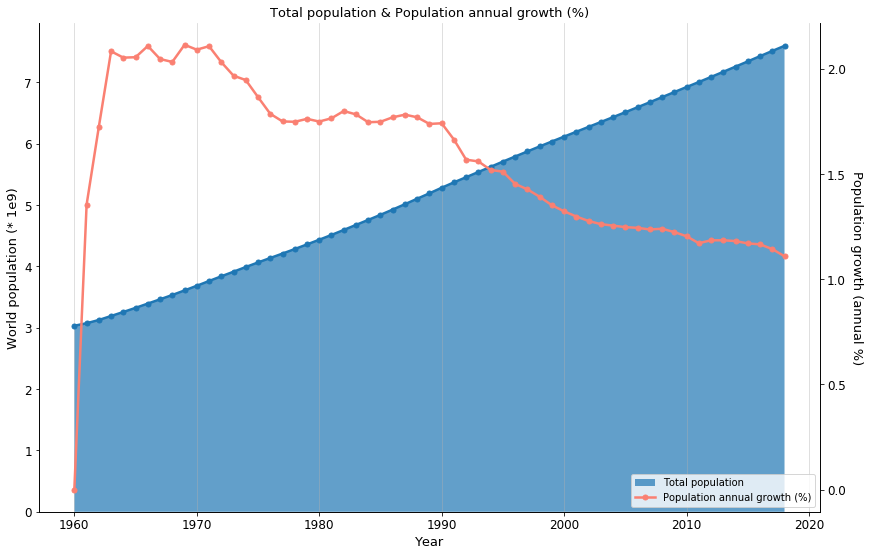

In [9]:
fig, axarr = plt.subplots(nrows=1, ncols=1, figsize=(14, 9))
axarr.set_title('Total population & Population annual growth (%)', fontdict={'fontsize': 13})

bar_tot = axarr.fill_between(pop_tot_1960_2018.index,
                             pop_tot_1960_2018['World'],
                             alpha=0.7)

axarr.plot(pop_tot_1960_2018.index,
           pop_tot_1960_2018['World'],
           linewidth=2.5,
           marker='.',
           markersize=10)


axarr_02 = axarr.twinx()
line_pct, = axarr_02.plot(pop_growthPct_1960_2018.index,
                          pop_growthPct_1960_2018['World'],
                          color='salmon',
                          linewidth=2.5,
                          marker='.',
                          markersize=10)

axarr.tick_params(axis='both', labelsize=12)
axarr.set_xlabel('Year', size=13)
axarr.set_ylabel('World population (* 1e9)', size=13)
axarr.set_ylim(bottom=0)
axarr.yaxis.set_major_formatter(FORMATTER_BILLIONS_0DEC)
axarr.spines['top'].set_visible(False)
axarr.grid(alpha=0.5, axis='x')

axarr_02.tick_params(axis='both', labelsize=12)
axarr_02.set_ylabel('Population growth (annual %)', rotation=270, labelpad=17, size=13)
axarr_02.spines['top'].set_visible(False)
axarr_02.legend(handles=(bar_tot, line_pct),
                labels=('Total population', 'Population annual growth (%)'), loc=4)

plt.show()
# plt.savefig('population-and-growth_black.png', bbox_inches='tight')

The graph above describes the world's total population and population annual growth from 1960 to 2018. During nearly 60 years, total population increases 150%; especially between 1963 and 1973, the population annual growth is higher than or equal to 2%, and keeps around 1.7% annual increasing until to 1990, then the population increasing has slowed down since nearly 30 years, for the last 8 years, the annual inceasing is around 1.2%.

In [10]:
imf_dvlping_ctries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia',
                      'Aruba', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize',
                      'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
                      'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Cape Verde',
                      'Central African Republic', 'Chad', 'China', 'Chile', 'Colombia', 'Comoros',
                      'Democratic Republic of the Congo', 'Republic of the Congo', 'Costa Rica', 'Côte d\'Ivoire',
                      'Croatia', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
                      'Equatorial Guinea', 'Eritrea', 'Eswatini (Swaziland)', 'Ethiopia', 'Fiji', 'Gabon',
                      'The Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
                      'Haiti', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan',
                      'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon',
                      'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi','Malaysia', 'Maldives', 'Mali',
                      'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Federated States of Micronesia',
                      'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru',
                      'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Oman', 'Pakistan', 'Palau',
                      'Panama', 'Papua New Guinea','Paraguay', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania',
                      'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
                      'Samoa', 'São Tomé and Príncipe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
                      'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka',
                      'Sudan', 'Suriname', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo',
                      'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda',
                      'Ukraine', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia',
                      'Zimbabwe', 'Cuba', 'North Korea', 'Palestinian territories', 'Sahrawi Arab Democratic Republic']

In [11]:
imf_dvlped_ctries = ['Lithuania', 'Latvia', 'Estonia', 'Israel', 'Slovenia', 'Czech Republic',
                     'Slovak Republic', 'Portugal', 'South Korea', 'Greece', 'New Zealand', 'Spain',
                     'Finland', 'Ireland', 'Iceland', 'United Kingdom', 'Italy', 'Sweden', 'Australia',
                     'Belgium', 'Canada', 'France', 'Luxembourg', 'Japan', 'Austria', 'Denmark',
                     'Germany', 'Netherlands', 'United States', 'Norway', 'Switzerland', 'Malta',
                     'Cyprus', 'Singapore','Puerto Rico', 'San Marino']